# PART I: Comprehensive Colab Notebook

- This project aims to perform a comprehensive analysis of `product reviews` for `Beats by Dre` products, utilizing **Python libraries** such as `Pandas`, `Matplotlib`, `Seaborn`, and `TextBlob`.
- The objectives are to understand ***the data distribution***, ***identify patterns*** and ***relationships***, and ***analyze the sentiment of the reviews*** to gain insights into consumer opinions and preferences regarding **Beats by Dre** products.

### Table of Contents

1. **Setting up**
    - Importing Libraries
    - Loading the Dataset
2. **Data Import and Preprocessing**
    - Displaying Initial Rows
    - Descriptive Statistics
    - Handling Missing Values
    - Detecting and handling Duplicates values
    - Display the updated dataframe
3. **Exploratory Data Analysis (EDA)**
    - Comparison of the Number of Reviews for `Beats by Dre Products` against `Competitor Products`.
    - Distribution of Ratings
    - Violin plot of Ratings
    - `Word Cloud` of Reviews for `Beats By Dre's Products`.
    - `Word Cloud` of Reviews for `Beats Competitors' Products`.
    - Correlation Matrix Heatmap
4. **Sentiment Analysis**
    - Performing Sentiment Analysis with TextBlob
    - Classifying and Aggregating Sentiment Scores
    - Visualizing Sentiment Distribution
5. **Conclusion**
    - Summarize your findings from the EDA and sentiment analysis.
    - Provide insights and potential implications for Beats by Dre based on the analyzed data.

## **1. Setting up**

-  Importing Libraries.

In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud

- Loading the Dataset.

In [62]:
file_path = 'cleaned_data_df.csv'
my_df = pd.read_csv(file_path)

## **2. Data Import and Preprocessing**

- Display the first few rows of the dataset.

In [63]:
my_df.head()

,review_id,product_id,title,author,rating,content,timestamp,profile_id,is_verified,helpful_count,product_attributes
0,R3VJHX5IUE1GW0,B09JL41N9C,"5.0 out of 5 stars Good sound, seamless iPhone...",Bobby K - NYC,5,"I like how secure these earphones are, comfort...","Reviewed in the United States June 6, 2024",AFPG4YAKAUOQ6GGBHNKLZ4E3JDBQ,True,5.0,Color: Beats WhiteStyle: Fit ProSet: Without A...
1,R3O2F0G4RQELXK,B09JL41N9C,5.0 out of 5 stars Movement focused TW earbuds...,Ant,5,My pair of Beats Powerbeats Pros were starting...,"Reviewed in the United States March 8, 2024",AFHZTD2L5OXDW2RC4GDSIBRMAB6A,True,5.0,Color: Sage GrayStyle: Fit ProSet: Without App...
2,R35IQTO062Y7LU,B09JL41N9C,5.0 out of 5 stars Best wireless noise cancell...,theInternational,5,I am a long-time user of the Bose QuietComfort...,"Reviewed in the United States July 13, 2022",AHJD4656VLR6I3TCW544TITKJBUQ,True,5.0,Color: Sage GrayStyle: Fit ProSet: Without App...
3,R2LFEEQXQDETXR,B09JL41N9C,4.0 out of 5 stars Good Apple Ecosystem Option...,C. Godby,4,"Before buying the Beats Fit Pro, I've owned th...","Reviewed in the United States February 8, 2023",AHYLFTWLZ5YY5FWN3UBI4YSR3ROQ,True,5.0,Color: Beats BlackStyle: Fit ProSet: Without A...
4,R2JXCMRVKF84KR,B09JL41N9C,5.0 out of 5 stars Elevating the Listening Exp...,Kailash,5,I recently had the pleasure of trying out the ...,"Reviewed in the United States March 21, 2024",AG77DIMEIWDUUMGCBEAOODGVITPA,True,5.0,Color: Tidal BlueStyle: Fit ProSet: Without Ap...


- Descriptive Statistics.

In [152]:
my_df.describe()

,rating,helpful_count,sentiment
count,1033.000000,1033.000000,1033.000000
mean,4.275895,1.392062,0.239478
std,0.912005,1.915415,0.185503
min,1.000000,0.000000,-0.583333
25%,4.000000,0.000000,0.127355
50%,5.000000,0.000000,0.216667
75%,5.000000,2.000000,0.324888
max,5.000000,5.000000,1.000000


- Handling Missing Values
`Because I am using the cleaned dataset, I have already handled the missing value.`

In [65]:
my_df.isnull().sum()

review_id             0
product_id            0
title                 0
author                0
rating                0
content               0
timestamp             0
profile_id            0
is_verified           0
helpful_count         0
product_attributes    0
dtype: int64

- Detecting and handling Duplicates values.

In [66]:
# Check for duplicates and remove them if necessary
my_df.drop_duplicates(inplace=True)

- Display the updated dataframe.

In [67]:
my_df.head()

,review_id,product_id,title,author,rating,content,timestamp,profile_id,is_verified,helpful_count,product_attributes
0,R3VJHX5IUE1GW0,B09JL41N9C,"5.0 out of 5 stars Good sound, seamless iPhone...",Bobby K - NYC,5,"I like how secure these earphones are, comfort...","Reviewed in the United States June 6, 2024",AFPG4YAKAUOQ6GGBHNKLZ4E3JDBQ,True,5.0,Color: Beats WhiteStyle: Fit ProSet: Without A...
1,R3O2F0G4RQELXK,B09JL41N9C,5.0 out of 5 stars Movement focused TW earbuds...,Ant,5,My pair of Beats Powerbeats Pros were starting...,"Reviewed in the United States March 8, 2024",AFHZTD2L5OXDW2RC4GDSIBRMAB6A,True,5.0,Color: Sage GrayStyle: Fit ProSet: Without App...
2,R35IQTO062Y7LU,B09JL41N9C,5.0 out of 5 stars Best wireless noise cancell...,theInternational,5,I am a long-time user of the Bose QuietComfort...,"Reviewed in the United States July 13, 2022",AHJD4656VLR6I3TCW544TITKJBUQ,True,5.0,Color: Sage GrayStyle: Fit ProSet: Without App...
3,R2LFEEQXQDETXR,B09JL41N9C,4.0 out of 5 stars Good Apple Ecosystem Option...,C. Godby,4,"Before buying the Beats Fit Pro, I've owned th...","Reviewed in the United States February 8, 2023",AHYLFTWLZ5YY5FWN3UBI4YSR3ROQ,True,5.0,Color: Beats BlackStyle: Fit ProSet: Without A...
4,R2JXCMRVKF84KR,B09JL41N9C,5.0 out of 5 stars Elevating the Listening Exp...,Kailash,5,I recently had the pleasure of trying out the ...,"Reviewed in the United States March 21, 2024",AG77DIMEIWDUUMGCBEAOODGVITPA,True,5.0,Color: Tidal BlueStyle: Fit ProSet: Without Ap...


## **3. Exploratory Data Analysis (EDA)**

- Comparison of the Number of Reviews for `Beats by Dre Products` **VS** `Competitor Products`.

In [126]:
# List of Beats by Dre product ASINs
specified_asins = ["B09JL41N9C", "B0CCBKGDJD"]

# Filter reviews for specified products
specified_reviews = my_df[my_df['product_id'].isin(specified_asins)]

# Filter reviews for other products
other_reviews = my_df[~my_df['product_id'].isin(specified_asins)]

# Create the data for the bar plot
review_counts = pd.Series([specified_reviews.shape[0], other_reviews.shape[0]], index = ['Beats by Dre Products', 'Competitor Products'])

# Create a DataFrame for plotting
review_counts_df = review_counts.reset_index()
review_counts_df.columns = ['Product Group', 'Count']

# Define the custom color palette
custom_palette = ['orange', 'yellow']  # Blue for Beats by Dre, Orange for Competitor Products

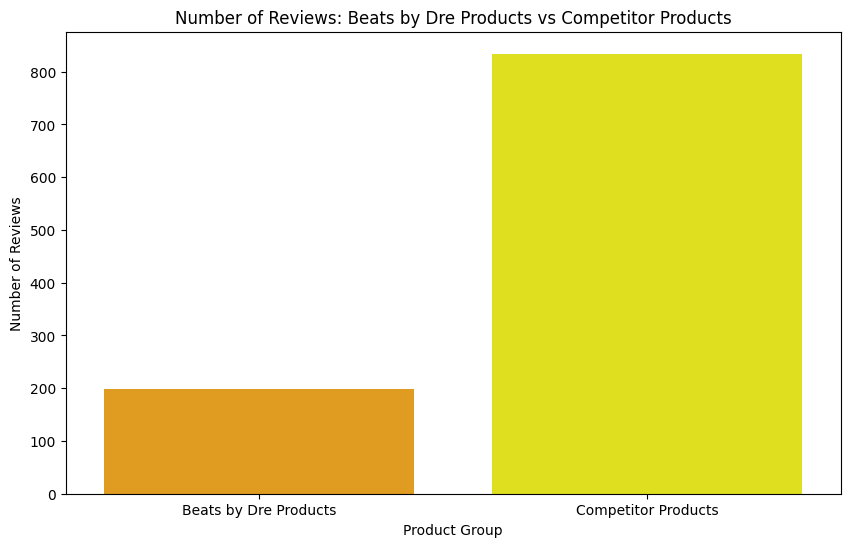

In [127]:
# Plot the bar plot with custom colors
plt.figure(figsize = (10, 6))
sns.barplot(x = 'Product Group', y = 'Count', data=review_counts_df, palette = custom_palette, hue = 'Product Group', dodge=False)
plt.title('Number of Reviews: Beats by Dre Products vs Competitor Products')
plt.xlabel('Product Group')
plt.ylabel('Number of Reviews')
plt.legend([],[], frameon = False)  # Hide the legend
plt.show()

- Distribution of Ratings using **`Histogram`**.

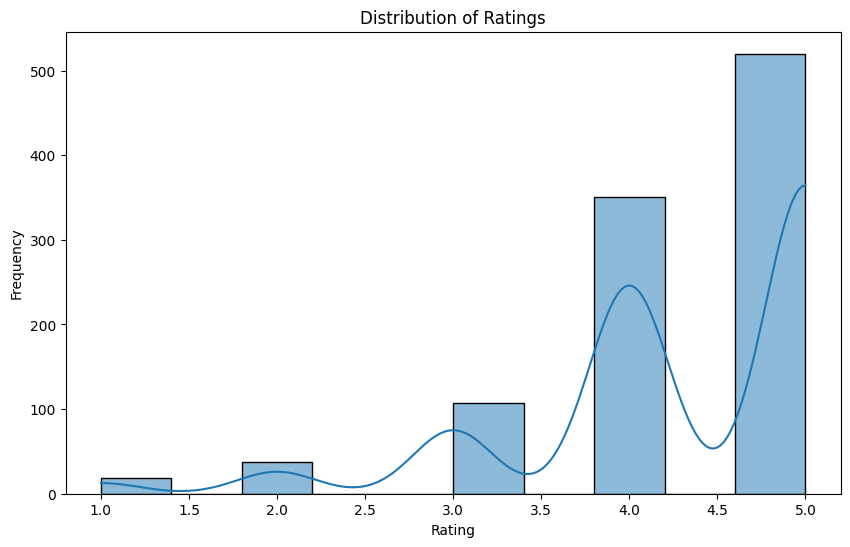

In [88]:
plt.figure(figsize = (10, 6))
sns.histplot(my_df['rating'], bins = 10, kde = True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

```
NB: The histogram shows the distribution of ratings, which are predominantly positive.
```

- Distribution of Ratings using **`Violin plot`**.

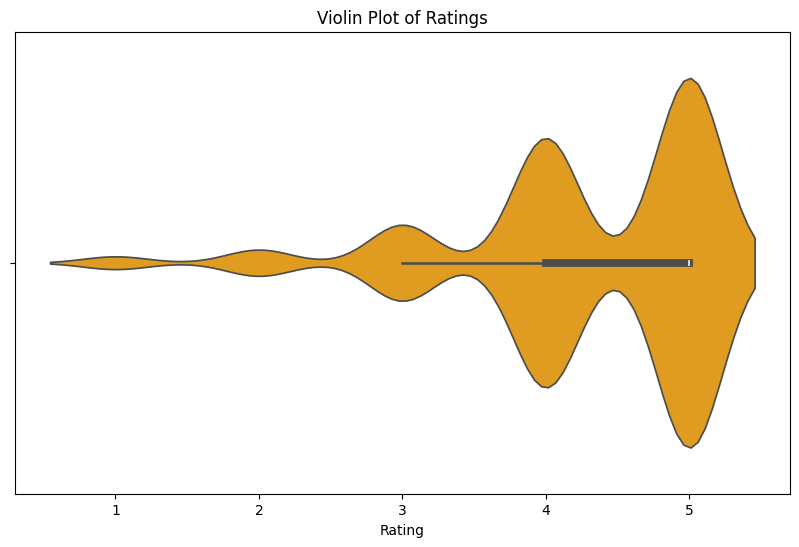

In [129]:
# Violin plot for ratings
plt.figure(figsize=(10, 6))
sns.violinplot(x='rating', data= my_df, color = 'orange')
plt.title('Violin Plot of Ratings')
plt.xlabel('Rating')
plt.show()

```
The Violin plot illustrates that the majority of ratings are 4 , 4.5, or 5, indicating high satisfaction.
```

- `Word Cloud` of Reviews for `Beats By Dre's Products`.

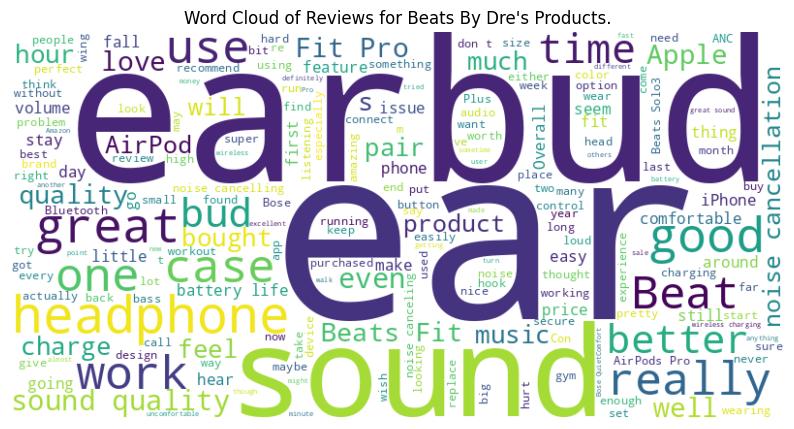

In [139]:
# Combine all reviews for specified products into one string
specified_reviews_text = ' '.join(specified_reviews['content'].dropna().astype(str))

# Generate the word cloud for specified products
specified_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(specified_reviews_text)

# Display the word cloud for specified products
plt.figure(figsize=(10, 6))
plt.imshow(specified_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Reviews for Beats By Dre's Products.")
plt.show()

- `Word Cloud` of Reviews for `Beats Competitors' Products`.

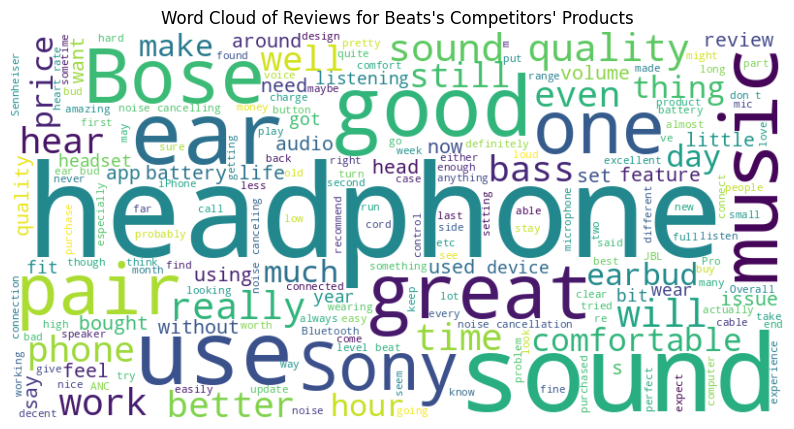

In [143]:
# Combine all reviews for other products into one string
other_reviews_text = ' '.join(other_reviews['content'].dropna().astype(str))

# Generate the word cloud for other products
other_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(other_reviews_text)

# Display the word cloud for other products
plt.figure(figsize=(10, 6))
plt.imshow(other_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Reviews for Beats's Competitors' Products")
plt.show()

- Correlation Matrix Heatmap

**NB: We are working on a copy of the initial cleaned dataset since we are goind to convert some columns that were initially string into numeric values.**

In [150]:
# We made a copy of our cleaned data since we will convert some columns to numeric values.
my_copy_df = my_df.copy()

# Ensure 'content' column entries are strings and handle missing values
my_copy_df['content'] = my_copy_df['content'].fillna('').astype(str)

# Ensure 'rating' is numeric
my_copy_df['rating'] = pd.to_numeric(my_copy_df['rating'], errors = 'coerce')

# Convert 'content' to a sentiment score
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

my_copy_df['content'] = my_copy_df['content'].fillna('').astype(str).apply(get_sentiment)

# Convert 'is_verified' to numeric
my_copy_df['is_verified'] = my_copy_df['is_verified'].astype(int)

# Convert 'helpful_count' to numeric
my_copy_df['helpful_count'] = pd.to_numeric(my_copy_df['helpful_count'], errors = 'coerce')

# Calculate the correlation matrix
correlation_matrix = my_copy_df[['rating', 'content', 'is_verified', 'helpful_count']].corr()


**Plot the heatmap**

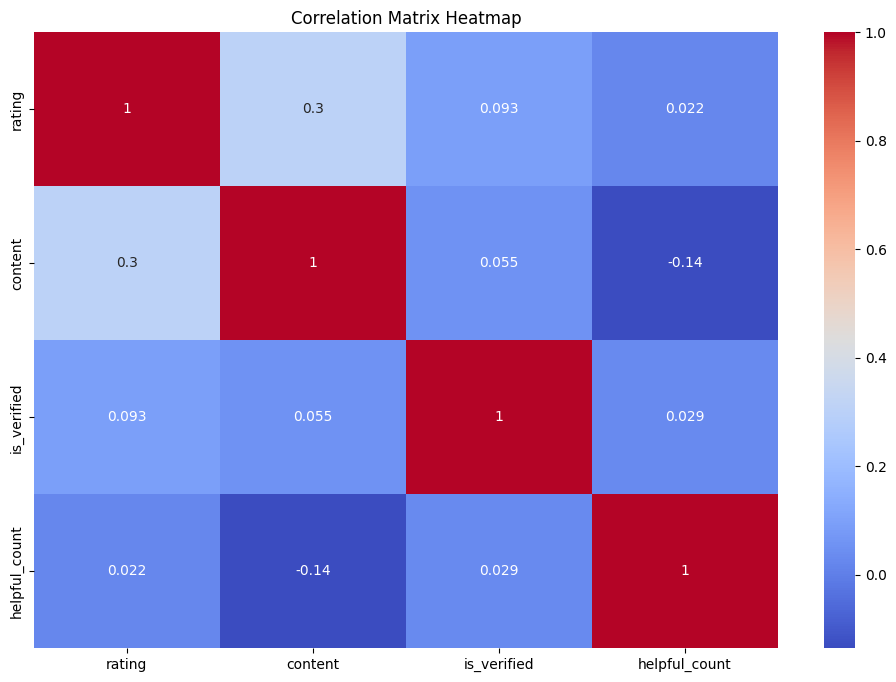

In [151]:
# Plot the heatmap
plt.figure(figsize = (12, 8))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

## **4. Sentiment Analysis**

- Performing Sentiment Analysis with TextBlob

In [145]:
# Ensure 'content' column entries are strings and handle missing values
my_df['content'] = my_df['content'].fillna('').astype(str)

# Perform sentiment analysis on the text reviews
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Assuming the dataset uses 'content' column for reviews
my_df['sentiment'] = my_df['content'].apply(get_sentiment)

# Classify the reviews into positive, negative, and neutral sentiments
my_df['sentiment_category'] = my_df['sentiment'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

- Classifying and Aggregating Sentiment Scores

In [146]:
# Classify the reviews into positive, negative, and neutral sentiments
my_df['sentiment_category'] = my_df['sentiment'].apply(lambda x: 'positive' if x and x > 0 else ('negative' if x and x < 0 else 'neutral'))

# Aggregate the sentiment scores to assess overall consumer sentiment
sentiment_counts = my_df['sentiment_category'].value_counts()

- Visualizing Sentiment Distribution

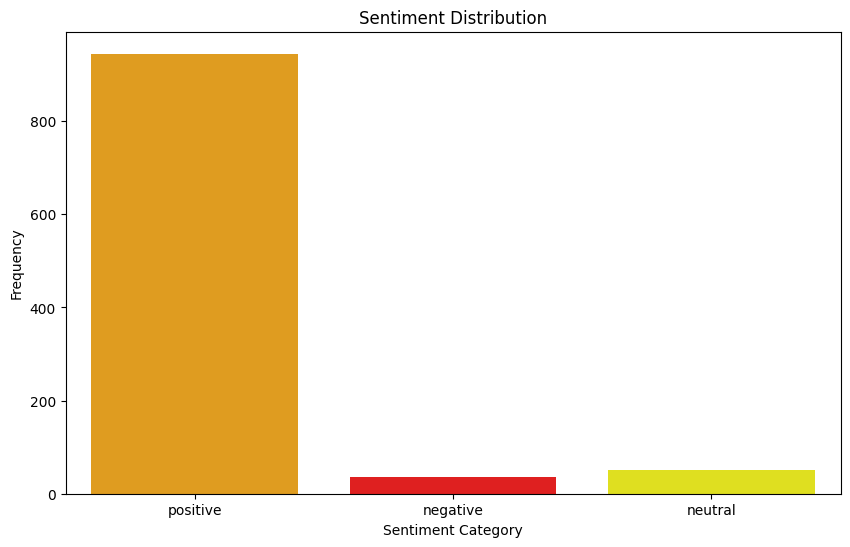

In [147]:
# First, we have to define the color palette
palette = {
    'positive': 'orange',
    'negative': 'red',
    'neutral': 'yellow'
}

# Plotting the sentiment distribution
plt.figure(figsize = (10, 6))
sns.countplot(x = 'sentiment_category', hue = 'sentiment_category', data = my_df, palette = palette, dodge = False)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Category')
plt.ylabel('Frequency')
plt.show()

## **5. Conclusion**

- **Summarize your findings from the EDA and sentiment analysis.**

#### Descriptive Statistics
- The dataset consists of **`1,033`** reviews.
- The average rating is **`4.28`**, which indicates general customer satisfaction.
- The sentiment score has a mean of **`0.24`**, suggesting that the overall sentiment in the reviews is positive.
- The `helpful_count` has a mean of **`1.39`**, indicating that on average, each review received a little over one helpful vote.

#### Number of Reviews
- Beats by Dre products have significantly fewer reviews (around 200) compared to competitor products (over 800). This is because we are analyzing only tow Beats's product compare to 9 competitors' products. penetration.

#### Distribution of Ratings
- Ratings are heavily skewed towards the higher end, with the majority of ratings being **`4`** or **`5`**.
- There are very few ratings below **`3`**, indicating high customer satisfaction.

#### Violin Plot of Ratings
- The violin plot shows that most ratings are concentrated around **`4`** and **`5`**, with a few outliers at the lower end.
- The distribution is quite tight around the higher ratings, reinforcing the observation of high customer satisfaction.

#### Word Cloud Analysis
- **Beats by Dre Products**: The word cloud highlights terms like `"sound"`, `"ear"`, `"headphone"`, `"great"`, `"quality"`, and `"battery"`. This indicates that customers appreciate the sound quality and battery life.

- **Competitors' Products**: The word cloud highlights terms like `"sound"`, `"headphone"`, `"great"`, `"good"`, `"quality"`, and `"price"`. This indicates that competitors are also recognized for sound quality and good value for money.


#### Correlation Analysis
- **Rating and Sentiment**: A moderate positive correlation `(0.3)` indicates that `more positive sentiment in review content is associated with higher ratings.`
- **Rating and Is Verified**: A weak positive correlation `(0.093)` suggests that `verified purchases tend to have slightly higher ratings.`
- **Rating and Helpful Count**: A very weak correlation `(0.022)` suggests that the number of helpful votes `is not strongly linked to ratings.`
- **Sentiment and Helpful Count**: A weak negative correlation `(-0.14)` suggests that there the `relationship` between `customer sentiment` and `helpful count is not strong.`


#### Sentiment Distribution
- The `majority of reviews are positive`, with very few negative or neutral reviews.

- **Provide insights and potential implications for Beats by Dre based on the analyzed data.**

### Recommendations for Beats by Dre

#### Enhance Review Collection
- **Increase Customer Engagement**: Encourage more customers to leave reviews by offering incentives like discounts on future purchases or entry into a prize draw.
- **Focus on Verified Reviews**: Promote verified reviews as they tend to have slightly higher ratings, enhancing the overall perceived product quality.

#### Product Improvements
- **Sound Quality and Battery Life**: Continue to focus on and enhance these aspects as they are highly appreciated by customers.
- **Innovate Based on Feedback**: Analyze lower-rated reviews to identify common pain points and areas for improvement. Address these issues in future product iterations.

#### Competitive Differentiation
- **Unique Features**: Highlight unique features that differentiate Beats by Dre from competitors, such as advanced noise cancellation, premium design, or exclusive partnerships with artists.
- **Pricing Strategy**: Consider competitive pricing strategies or value-added bundles to attract price-sensitive customers.

### **Conclusion**

**Beats By Dre** has `high customer satisfaction`, as shown by their `excellent ratings` and `positive feedback in reviews.` To keep and improve their market position, they should `work on boosting customer engagement`, `making the most of positive reviews`, and `continually enhancing their products` based on feedback. Standing out in a competitive market will require `highlighting unique features`, `offering competitive pricing`, and `maintaining strong branding.` Following these recommendations can result in better `customer loyalty,` `increased sales`, and `long-term market leadership.`